In [59]:
import requests
import pandas as pd

#api_key = 'GLM99WZ24HN6NGJM'
api_key = 'FTCAN551TMQBI2IC'
#api_key = 'SRWEWJNP9LO1RWR6'
#api_key = '0KDX9ELUGRUS6K4R'

In [ ]:
import main

**Available Function for Free API**

*Core Stock*


In [3]:
# Core Stock
TIME_SERIES_INTRADAY = 'TIME_SERIES_INTRADAY'
TIME_SERIES_DAILY = 'TIME_SERIES_DAILY'
TIME_SERIES_WEEKLY = 'TIME_SERIES_WEEKLY'
TIME_SERIES_WEEKLY_ADJUSTED = 'TIME_SERIES_WEEKLY_ADJUSTED'
TIME_SERIES_MONTHLY = 'TIME_SERIES_MONTHLY'
TIME_SERIES_MONTHLY_ADJUSTED = 'TIME_SERIES_MONTHLY_ADJUSTED'

# Options Data
# Alpha Intelligence
# Fundamental Data
# Forex
# Cryptocurrency
# Commodities
# Technical Indicator
# Economic Indicator

In [ ]:
url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&apikey=' + api_key
r = requests.get(url)
data = r.json()

print(data)

{'bestMatches': [{'1. symbol': 'ASII', '2. name': 'Accredited Solutions Inc', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '1.0000'}, {'1. symbol': 'ASIIL.BSE', '2. name': 'ASI Industries Ltd', '3. type': 'Equity', '4. region': 'India/Bombay', '5. marketOpen': '09:15', '6. marketClose': '15:30', '7. timezone': 'UTC+5.5', '8. currency': 'INR', '9. matchScore': '0.6667'}]}


## Core Stock API

In [5]:
def core_stock(function, ticker, interval = '5min', month = '2010-01', size='compact'):
    url = f'https://www.alphavantage.co/query?function={function}&symbol={ticker}&outputsize={size}&apikey={api_key}'
    #url = f'https://www.alphavantage.co/query?function={function}&symbol={ticker}&interval={interval}&month={month}&outputsize={size}&apikey={api_key}'
    r = requests.get(url)
    return r.json()

In [6]:
def stock_df(ticker, function, interval = '5min', month = '2010-01', size='compact', debug=True):
    data = core_stock(function, ticker, interval, month, size)
    info = list(data.keys())
    time_series = info[1]
    meta_data = info[0]
    df = pd.DataFrame(data[time_series]).T

    if debug:
        print("Ticker         :", data[meta_data]['2. Symbol'])
        print("Last Refreshed :", data[meta_data]['3. Last Refreshed'])


    return df

In [7]:
data = core_stock(TIME_SERIES_DAILY ,'NVDA')
info = list(data.keys())
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'NVDA',
  '3. Last Refreshed': '2025-03-17',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-03-17': {'1. open': '122.7400',
   '2. high': '122.8900',
   '3. low': '118.0300',
   '4. close': '119.5300',
   '5. volume': '255501481'},
  '2025-03-14': {'1. open': '118.6100',
   '2. high': '121.8800',
   '3. low': '118.1500',
   '4. close': '121.6700',
   '5. volume': '277593455'},
  '2025-03-13': {'1. open': '117.0300',
   '2. high': '117.7600',
   '3. low': '113.7900',
   '4. close': '115.5800',
   '5. volume': '299033131'},
  '2025-03-12': {'1. open': '114.1200',
   '2. high': '116.7600',
   '3. low': '112.8800',
   '4. close': '115.7400',
   '5. volume': '323857454'},
  '2025-03-11': {'1. open': '106.9900',
   '2. high': '112.2360',
   '3. low': '104.7700',
   '4. close': '108.7600',
   '5. volume': '354865692'},
  '2025-03-10': {'1. open':

In [ ]:
def global_market():
    url = 'https://www.alphavantage.co/query?function=MARKET_STATUS&apikey=' + api_key
    response =  requests.get(url)
    return response.json()

market = global_market()

In [26]:
pd.DataFrame(market['markets'])

,market_type,region,primary_exchanges,local_open,local_close,current_status,notes
0,Equity,United States,"NASDAQ, NYSE, AMEX, BATS",09:30,16:15,open,
1,Equity,Canada,"Toronto, Toronto Ventures",09:30,16:00,open,
2,Equity,United Kingdom,London,08:00,16:30,open,
3,Equity,Germany,"XETRA, Berlin, Frankfurt, Munich, Stuttgart",08:00,20:00,open,
4,Equity,France,Paris,09:00,17:30,open,
5,Equity,Spain,"Barcelona, Madrid",09:00,17:30,open,
6,Equity,Portugal,Lisbon,08:00,16:30,open,
7,Equity,Japan,Tokyo,09:00,15:00,closed,Noon trading break from 11:30 to 12:30 local time
8,Equity,India,"NSE, BSE",09:15,15:30,closed,
9,Equity,Mainland China,"Shanghai, Shenzhen",09:30,15:00,closed,Noon trading break from 11:30 to 13:00 local time


## Options

In [49]:
from datetime import date, timedelta, datetime

In [42]:
def options(ticker):
    url = f'https://www.alphavantage.co/query?function=HISTORICAL_OPTIONS&symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()

    df = pd.DataFrame(data['data'])
    return df

In [43]:
ibm_option = options('NVDA')

In [56]:
ibm_option.head()

,contractID,symbol,expiration,strike,type,last,mark,bid,bid_size,ask,ask_size,volume,open_interest,date,implied_volatility,delta,gamma,theta,vega,rho
0,NVDA250321C00005000,NVDA,2025-03-21,5.00,call,111.00,110.47,110.05,86,110.90,76,1,6816,2025-03-18,3.83869,0.99996,0.00000,-0.00384,0.00002,0.00041
1,NVDA250321P00005000,NVDA,2025-03-21,5.00,put,0.01,0.01,0.00,0,0.01,4500,3,105,2025-03-18,3.83869,-0.00004,0.00000,-0.00325,0.00002,-0.00000
2,NVDA250321C00010000,NVDA,2025-03-21,10.00,call,106.58,105.50,105.10,46,105.90,50,40,249,2025-03-18,3.66489,0.99919,0.00003,-0.04963,0.00029,0.00081
3,NVDA250321P00010000,NVDA,2025-03-21,10.00,put,0.01,0.01,0.00,0,0.01,3000,1,5,2025-03-18,9.00666,-0.00033,0.00001,-0.01907,0.00013,-0.00000
4,NVDA250321C00015000,NVDA,2025-03-21,15.00,call,103.68,100.50,100.10,46,100.90,50,0,208,2025-03-18,9.02373,0.99816,0.00006,-0.09439,0.00062,0.00121


## Alpha Intelligence

In [61]:
url = "https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=COIN,CRYPTO:BTC,FOREX:USD&time_from=20220410T0130&limit=1000&apikey="+api_key
response = requests.get(url)
data = response.json()





In [63]:
data.keys()

dict_keys(['items', 'sentiment_score_definition', 'relevance_score_definition', 'feed'])

In [74]:
df = pd.DataFrame(data['feed'])
df

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,Bitcoin's role as an inflation hedge depends o...,https://cointelegraph.com/news/bitcoin-s-role-...,20250315T160000,[David Feliba],"For years, inflation was primarily a concern f...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Cointelegraph,n/a,cointelegraph.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.032251,Neutral,"[{'ticker': 'COIN', 'relevance_score': '0.0873..."
1,Trump's Crypto Plan: Which Cryptocurrency Sect...,https://www.fool.com/investing/2025/03/14/trum...,20250314T175751,[Dominic Basulto],The new year started off with considerable fan...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.288463,Somewhat-Bullish,"[{'ticker': 'NYT', 'relevance_score': '0.04028..."
2,Trump Plans to 'Rescind and Amend' IRS Crypto ...,https://decrypt.co/309172/trump-rescind-irs-cr...,20250307T230629,[André Beganski],President Donald Trump detailed how the U.S. p...,https://cdn.decrypt.co/resize/1024/height/512/...,Decrypt.co,n/a,decrypt.co,"[{'topic': 'Finance', 'relevance_score': '1.0'...",0.237679,Somewhat-Bullish,"[{'ticker': 'COIN', 'relevance_score': '0.0943..."
3,Bitwise makes first institutional DeFi allocation,https://cointelegraph.com/news/bitwise-makes-f...,20250306T163500,[Alex O’Donnell],Onchain data from early March suggests Bitwise...,https://images.cointelegraph.com/cdn-cgi/image...,Cointelegraph,n/a,cointelegraph.com,"[{'topic': 'Finance', 'relevance_score': '1.0'...",0.340288,Somewhat-Bullish,"[{'ticker': 'COIN', 'relevance_score': '0.1024..."
4,Binance to Delist Tether and Other Stablecoins...,https://decrypt.co/308449/binance-to-delist-te...,20250303T132028,[Ryan S. Gladwin],The news of Tether's delisting comes as the fi...,https://cdn.decrypt.co/resize/1024/height/512/...,Decrypt.co,n/a,decrypt.co,"[{'topic': 'Finance', 'relevance_score': '1.0'...",0.085599,Neutral,"[{'ticker': 'COIN', 'relevance_score': '0.0728..."
5,Coinbase Targets USDT Stablecoin Rival Tether ...,https://decrypt.co/306070/coinbase-targets-tet...,20250216T154050,[André Beganski],Coinbase CEO Brian Armstrong said the firm aim...,https://cdn.decrypt.co/resize/1024/height/512/...,Decrypt.co,n/a,decrypt.co,"[{'topic': 'Financial Markets', 'relevance_sco...",0.207729,Somewhat-Bullish,"[{'ticker': 'COIN', 'relevance_score': '0.2880..."
6,Cryptocurrency Market to Grow by USD 39.75 Bil...,https://www.benzinga.com/pressreleases/25/02/n...,20250215T033400,[],"NEW YORK, Feb. 14, 2025 /PRNewswire/ -- Report...",https://mma.prnewswire.com/media/2619505/Techn...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Life Sciences', 'relevance_score':...",0.220948,Somewhat-Bullish,"[{'ticker': 'MARA', 'relevance_score': '0.0240..."
7,The Threat of Fraud Is Keeping Some Investors ...,https://www.fool.com/investing/2025/02/09/thre...,20250209T114400,[Ryan Vanzo],Crypto markets remain volatile. But over the l...,https://g.foolcdn.com/editorial/images/805602/...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.150195,Somewhat-Bullish,"[{'ticker': 'COIN', 'relevance_score': '0.0603..."
8,Cryptocurrency Market to Grow by USD 39.75 Bil...,https://www.benzinga.com/pressreleases/25/02/n...,20250207T063000,[PRNewswire],"NEW YORK, Feb. 7, 2025 /PRNewswire/ -- Report ...",https://mma.prnewswire.com/media/2614854/IRTNT...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Life Sciences', 'relevance_score':...",0.220944,Somewhat-Bullish,"[{'ticker': 'MARA', 'relevance_score': '0.0240..."
9,Cryptocurrency Market to Grow by USD 39.75 Bil...,https://www.benzinga.com/pressreleases/25/01/n...,20250130T061900,[PRNewswire],"NEW YORK, Jan. 30, 2025 /PRNewswire/ -- Report...",https://mma.prnewswire.com/media/2608956/Techn...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Life Sciences', 'rel

{'items': '18',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': "Bitcoin's role as an inflation hedge depends on where one lives - Analyst",
   'url': 'https://cointelegraph.com/news/bitcoin-s-role-as-inflation-hedge-depends-on-where-one-lives-analyst',
   'time_published': '20250315T160000',
   'authors': ['David Feliba'],
   'summary': 'For years, inflation was primarily a concern for emerging markets, where volatile currencies and economic instability made rising prices a persistent challenge. However, in the wake of the COVID-19 pandemic, inflation became a global issue.',
   'banner_image': '',
   'source': 'Cointelegraph',
   'category_within_source': 'n/a',
   'source_domain': 'cointelegraph.com',
   'topics': [{'topic': 'Economy - Monetary'
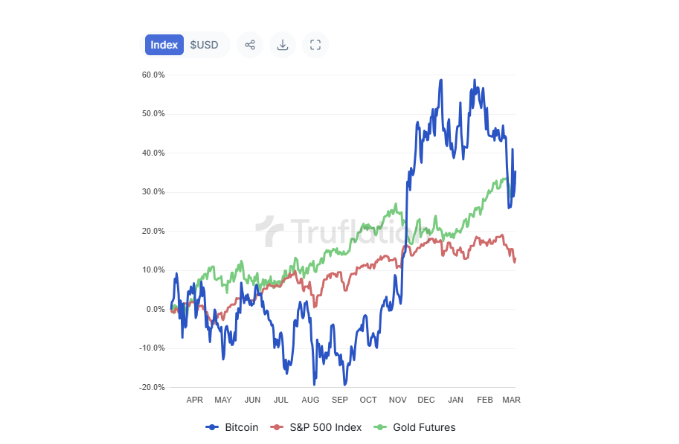

In [ ]:
data

## Fundamental Data

In [75]:
def company_overview(ticker):
    url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey='+api_key
    r = requests.get(url)
    data = r.json()
    return data

In [ ]:
nvda = company_overview("NVDA")


In [86]:
for keys, value in zip(nvda.keys(), nvda.values()):
    max_length = max(len(key) for key in nvda.keys()) + 2
    print(f"{keys.ljust(max_length)}  : {value}")

Symbol                        : NVDA
AssetType                     : Common Stock
Name                          : NVIDIA Corporation
Description                   : Nvidia Corporation is an American multinational technology company incorporated in Delaware and based in Santa Clara, California. It designs graphics processing units (GPUs) for the gaming and professional markets, as well as system on a chip units (SoCs) for the mobile computing and automotive market.
CIK                           : 1045810
Exchange                      : NASDAQ
Currency                      : USD
Country                       : USA
Sector                        : MANUFACTURING
Industry                      : SEMICONDUCTORS & RELATED DEVICES
Address                       : 2701 SAN TOMAS EXPRESSWAY, SANTA CLARA, CA, US
OfficialSite                  : https://www.nvidia.com
FiscalYearEnd                 : January
LatestQuarter                 : 2025-01-31
MarketCapitalization          : 2816491913000
EBITDA